<a href="https://colab.research.google.com/github/Dhanush-sai-reddy/Hull-Tactical---Market-Prediction/blob/main/notebook1e850736a0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import zipfile
import os

zip_file_path = '/content/hull-tactical-market-prediction.zip'
extract_dir = '/content/hull-tactical-market-prediction/'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File '{zip_file_path}' unzipped to '{extract_dir}' successfully.")
print(f"Contents of '{extract_dir}':")
for item in os.listdir(extract_dir):
    print(item)

File '/content/hull-tactical-market-prediction.zip' unzipped to '/content/hull-tactical-market-prediction/' successfully.
Contents of '/content/hull-tactical-market-prediction/':
kaggle_evaluation
test.csv
train.csv


In [8]:
import pandas as pd
import numpy as np

In [9]:
train_path ='/content/hull-tactical-market-prediction/train.csv'
df =pd.read_csv(train_path)

In [10]:
df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [11]:
df.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,...,8042.000000,8042.000000,7536.000000,8042.000000,7537.000000,8042.000000,4509.000000,9048.000000,9048.000000,9048.000000
mean,4523.500000,0.031609,0.031609,0.047856,0.575265,0.190760,-0.238174,0.045756,0.142905,0.143236,...,0.487920,0.505426,0.373707,0.290294,0.144482,0.302430,0.122810,0.000470,0.000107,0.000052
std,2612.076951,0.174967,0.174967,0.213473,0.494330,0.392922,0.425990,0.208967,0.349995,0.350333,...,0.306253,0.306571,1.149195,0.313430,1.322779,0.350292,1.270592,0.010535,0.000088,0.010552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000661,0.000661,-2.723527,0.000661,-2.027551,0.000661,-1.497420,-0.039754,-0.000004,-0.040582
25%,2261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.205688,0.234954,-0.466911,0.000661,-0.794254,0.000661,-0.731204,-0.004321,0.000008,-0.004751
50%,4523.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.488757,0.516865,0.283280,0.185185,-0.103035,0.098049,-0.181941,0.000661,0.000099,0.000257
75%,6785.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.759094,0.770503,1.117657,0.525132,0.788774,0.587302,0.670649,0.005891,0.000193,0.005469
max,9047.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6.809912,1.000000,12.678264,1.000000,12.997540,0.040661,0.000317,0.040551


In [12]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [13]:
df.isna()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()


,0
date_id,0
D1,0
D2,0
D3,0
D4,0
...,...
V8,1006
V9,4539
forward_returns,0
risk_free_rate,0


In [15]:
df.isna().sum().sum()
#total nans

np.int64(137675)

In [16]:
df[df.isna().any(axis=1)]
#rows with atleast one nan

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,6964,0,0,0,0,0,0,0,0,0,...,0.998677,0.993386,0.361122,0.830688,-0.562964,0.952381,-0.645116,0.010457,0.000038,0.010111
6965,6965,0,0,0,0,0,-1,0,0,0,...,0.984127,0.992725,0.735807,0.937169,-0.897940,0.972884,-0.917116,-0.003585,0.000039,-0.003932
6966,6966,0,0,0,0,0,-1,0,0,0,...,0.989418,0.993386,1.294909,0.873677,-0.736227,0.974868,-0.777680,-0.002331,0.000039,-0.002678
6967,6967,0,0,0,0,0,-1,0,0,0,...,0.963624,0.995370,0.511534,0.814153,-0.741770,0.953042,-0.766430,0.002336,0.000040,0.001989


In [17]:
df.columns[df.notna().all()]
#fully filled

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [18]:
dfna=df.columns[df.isna().any()]
dfna.shape

(85,)

#so 85 features has nan values in them

In [19]:
df_afterdrop=df.dropna().copy()

In [20]:
df_afterdrop.shape

(2079, 98)

In [21]:
#since a loss of lot of data shall fill the missing values

In [22]:
df = df.sort_values('date_id')

In [23]:
df

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,9043,0,0,0,1,1,0,0,1,0,...,0.186508,0.000661,1.010037,0.923942,-0.474519,0.080688,-0.439929,0.005458,0.000149,0.004998
9044,9044,0,0,0,1,1,0,0,1,0,...,0.128968,0.000661,0.492390,0.904101,-0.580852,0.070767,-0.496089,-0.004565,0.000147,-0.005024
9045,9045,0,0,0,1,1,0,0,0,1,...,0.062831,0.003307,0.332762,0.932540,-0.469138,0.057540,-0.411743,0.001852,0.000147,0.001395
9046,9046,0,0,0,1,1,0,0,0,1,...,0.011905,0.000661,0.476745,0.919974,-0.551739,0.052910,-0.468078,0.003463,0.000146,0.003006


In [24]:
target_col = 'market_forward_excess_returns'

In [25]:
exclude_cols = ['date_id', 'forward_returns', 'risk_free_rate', target_col]

In [26]:
feature_cols = [c for c in df.columns if c not in exclude_cols]

In [27]:
df[feature_cols]=df[feature_cols].ffill().bfill()
#ffill-->forward fill
#bfill--->backwardfill
df.isna()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.2 MB/s eta 0:00:00


In [29]:
test_path ='/content/hull-tactical-market-prediction/test.csv'
dftest=pd.read_csv(test_path)
dftest.shape

(10, 99)

In [30]:
df.shape

(9048, 98)

In [33]:
dftest

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V4,V5,V6,V7,V8,V9,is_scored,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,8980,0,0,0,0,1,0,0,1,0,...,0.828042,0.999173,0.759921,-0.803127,0.170966,-0.751909,True,0.003541,0.000161,0.003068
1,8981,0,0,0,0,1,0,0,1,0,...,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,True,-0.005964,0.000162,-0.006437
2,8982,0,0,0,0,1,0,0,0,1,...,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,True,-0.007410,0.000160,-0.007882
3,8983,0,0,0,0,1,0,0,0,1,...,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,True,0.005420,0.000160,0.004949
4,8984,0,0,0,0,0,0,1,0,1,...,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,True,0.008357,0.000159,0.007887
5,8985,0,0,0,0,0,0,0,0,0,...,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,True,-0.002896,0.000159,-0.003365
6,8986,0,0,0,0,0,0,0,0,0,...,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,True,0.002457,0.000155,0.001990
7,8987,0,0,1,0,0,0,0,0,0,...,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,True,0.002312,0.000156,0.001845
8,8988,0,0,0,0,0,0,0,0,0,...,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,True,0.002891,0.000156,0.002424
9,8989,0,0,0,0,0,0,0,0,0,...,0.783730,1.068037,0.879630,-0.764806,0.079034,-0.705662,False,0.008310,0.000156,0.007843


In [37]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

ticker = "SPY"
data = yf.download(ticker, period="2y", interval="1d")

data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility'] = data['Close'].pct_change().rolling(window=20).std()

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.5, 0.25, 0.25],
    subplot_titles=(f'{ticker} Price & Trend', 'Market Volatility (Shock Feature)', 'Volume')
)

fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['Open'], high=data['High'],
    low=data['Low'], close=data['Close'],
    name='Price'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=data.index, y=data['SMA_200'],
    line=dict(color='orange', width=2),
    name='200 SMA (Trend)'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=data.index, y=data['Volatility'],
    line=dict(color='purple', width=2),
    name='Volatility'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=data.index, y=data['Volume'],
    marker_color='teal',
    name='Volume'
), row=3, col=1)

fig.update_layout(
    title=f'{ticker} Hull Tactical Data Analysis',
    xaxis_rangeslider_visible=False,
    height=900,
    template="plotly_dark",
    hovermode="x unified"
)

fig.show()

/tmp/ipython-input-995393047.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


/tmp/ipython-input-5427375.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True



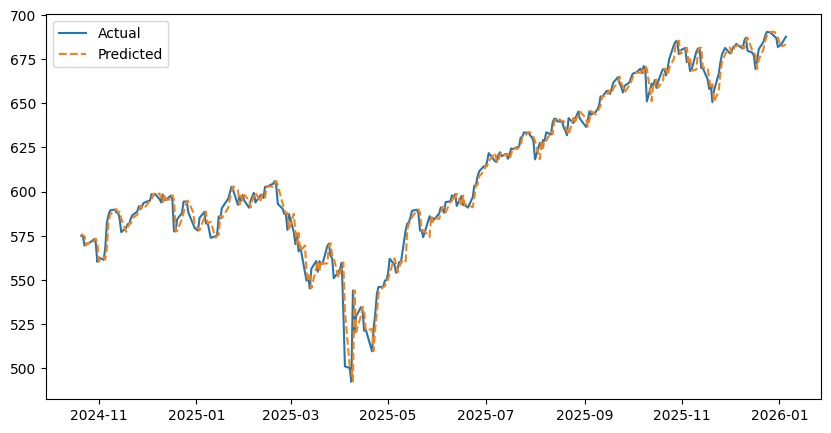

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = yf.download("SPY", start="2020-01-01", progress=False)
df = data[['Close']].copy()

df['Lag_1'] = df['Close'].shift(1)
df.dropna(inplace=True)

X = df[['Lag_1']]
y = df['Close']

split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted', linestyle='--')
plt.legend()
plt.show()

#here the model learnt that the best price thats closely related to tommorow is todays price ............so the graph is just shifted graph nothing more


/tmp/ipython-input-1225917444.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True



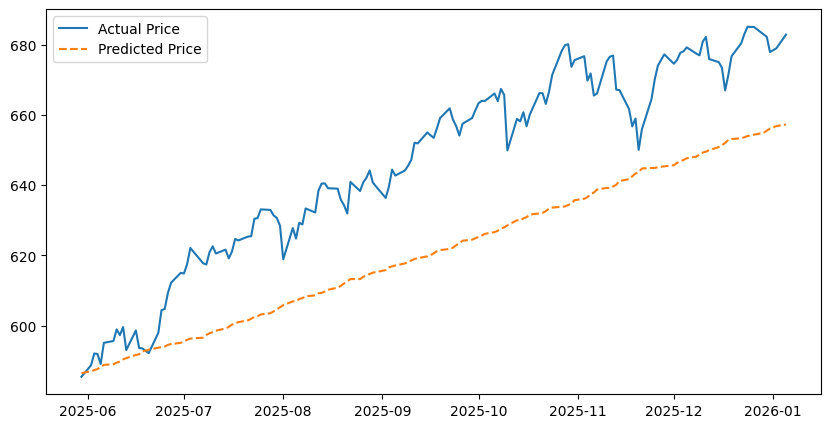

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = yf.download("SPY", start="2023-01-01", progress=False)
df = pd.DataFrame()

df['Return'] = data['Close'].pct_change()
df['Lag_1'] = df['Return'].shift(1)
df.dropna(inplace=True)

X = df[['Lag_1']]
y = df['Return']

split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

last_price = data['Close'].iloc[split-1]
actual_price = [last_price * (1 + x) for x in y_test.cumsum()]
predicted_price = [last_price * (1 + x) for x in pd.Series(predictions, index=y_test.index).cumsum()]

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, actual_price, label='Actual Price')
plt.plot(y_test.index, predicted_price, label='Predicted Price', linestyle='--')
plt.legend()
plt.show()

In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = yf.download("SPY", start="2020-01-01", progress=False)
df = pd.DataFrame()

df['Return'] = data['Close'].pct_change()
df['Lag_1'] = df['Return'].shift(1)
df['Lag_2'] = df['Return'].shift(2)
df['Range'] = (data['High'] - data['Low']) / data['Close']

df['Target'] = np.where(df['Return'].shift(-1) > 0, 1, 0)
df.dropna(inplace=True)

split = int(len(df) * 0.8)
features = ['Lag_1', 'Lag_2', 'Range']

X_train, X_test = df[features].iloc[:split], df[features].iloc[split:]
y_train, y_test = df['Target'].iloc[:split], df['Target'].iloc[split:]

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print(f"Directional Accuracy: {acc:.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

/tmp/ipython-input-3062359663.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True



Directional Accuracy: 57.28%

Confusion Matrix:
[[  0 129]
 [  0 173]]


#its guessing up for every single time


In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = yf.download("SPY", start="2020-01-01", progress=False, auto_adjust=False)
df = pd.DataFrame()
df['Close'] = data['Close']

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['Trend'] = df['Close'] / df['SMA_50']

df['Return'] = df['Close'].pct_change()
df['Target'] = np.where(df['Return'].shift(-1) > 0, 1, 0)
df.dropna(inplace=True)

split = int(len(df) * 0.8)
features = ['RSI', 'Trend']

X_train, X_test = df[features].iloc[:split], df[features].iloc[split:]
y_train, y_test = df['Target'].iloc[:split], df['Target'].iloc[split:]

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print(f"Real Accuracy: {acc:.2%}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Real Accuracy: 48.12%
Confusion Matrix:
[[46 79]
 [73 95]]
